In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier, risk_models, expected_returns
from sklearn.linear_model import LinearRegression
import yfinance as yf
from datetime import datetime

(CVXPY) Jan 07 01:42:44 PM: Encountered unexpected exception importing solver OSQP:
ImportError("dlopen(/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/osqp/_osqp.cpython-311-darwin.so, 0x0002): symbol not found in flat namespace '_csc_matrix'")


In [60]:
# CONVERT DATETIME IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
start_date = datetime(2013, 12, 20).strftime('%Y-%m-%d')
end_date = datetime(2023, 12, 20).strftime('%Y-%m-%d')

In [61]:
# Adjusted Close Price for current Dow Jones (DJIA) titles (without Dow Inc, since only in DJIA since 2019) 
tickers = "AXP AMGN AAPL BA CAT CSCO CVX GS HD HON IBM INTC JNJ KO JPM MCD MMM MRK MSFT NKE PG TRV UNH CRM VZ V WBA WMT DIS"
data_DJ = yf.download(tickers, start=start_date, end=end_date, group_by='tickers')

# Define a mapping of original tickers to custom names
custom_names = {
    "AXP": "American Express (AXP)",
    "AMGN": "Amgen Inc (AMGN)",
    "AAPL": "Apple Inc (AAPL)",
    "BA": "Boeing Co (BA)",
    "CAT": "Caterpillar Inc (CAT)",
    "CSCO": "Cisco Systems Inc (CSCO)",
    "CVX": "Chevorn Corp (CVX)",
    "GS": "Goldman Sachs Group (GS)",
    "HD": "Home Depot Inc (HD)",
    "HON": "Honeywell International Inc (HON)",
    "IBM": "IBM Corp  (IBM)",
    "INTC": "Intel Corp (INTC)",
    "JNJ": "Johnson & Johnson (JNJ)",
    "KO": "Coca-Cola Co (KO)",
    "JPM": "JPMorgan Chase & Co (JPM)",
    "MCD": "McDonald's Corp (MCD)",
    "MMM": "3M Co (MMM)",
    "MRK": "Merck & Co inc (MRK)",
    "MSFT": "Microsoft (MSFT)",
    "NKE": "Nike Inc (NKE)",
    "PG": "Procter & Gamble Co (PG)",
    "TRV": "Travelers Companies Inc (TRV)",
    "UNH": "UnitedHealth Group (UNH)",
    "CRM": "Salesforce Inc (CRM)",
    "VZ": "Verizon Communications Inc (VZ)",
    "V": "Visa Inc (V)",
    "WBA": "Walgreens Boots Alliance Inc (WBA)",
    "WMT": "Walmart Inc (WMT)",
    "DIS": "Walt Disney Co (DIS)",
}

# Create a new DataFrame for 'Adj Close' values
adj_close_data = pd.DataFrame()

# Extract 'Adj Close' for each ticker and add it as a new column with a custom name
for ticker in tickers.split():
    custom_name = custom_names.get(ticker, ticker)  # Use custom name if available, else use original ticker
    adj_close_data[custom_name] = data_DJ[ticker]['Adj Close']
adj_close_data

[*********************100%%**********************]  29 of 29 completed


,American Express (AXP),Amgen Inc (AMGN),Apple Inc (AAPL),Boeing Co (BA),Caterpillar Inc (CAT),Cisco Systems Inc (CSCO),Chevorn Corp (CVX),Goldman Sachs Group (GS),Home Depot Inc (HD),Honeywell International Inc (HON),...,Nike Inc (NKE),Procter & Gamble Co (PG),Travelers Companies Inc (TRV),UnitedHealth Group (UNH),Salesforce Inc (CRM),Verizon Communications Inc (VZ),Visa Inc (V),Walgreens Boots Alliance Inc (WBA),Walmart Inc (WMT),Walt Disney Co (DIS)
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-20,75.453583,86.656082,17.190046,116.807961,67.405571,15.341459,80.694473,145.337402,63.553669,69.520454,...,34.638901,61.383030,70.806877,62.952778,53.720001,29.690834,50.347942,42.672916,62.582455,66.414459
2013-12-23,76.091156,86.025352,17.849749,116.577187,68.186272,15.660919,80.707611,146.424362,63.966572,69.652428,...,34.535896,60.985516,70.790993,63.811039,54.580002,29.999596,50.828175,41.588760,62.938053,67.221695
2013-12-24,76.418617,85.303398,17.773983,116.944664,68.906334,15.748045,81.174255,146.167206,64.030090,70.219147,...,34.782227,60.985516,71.052986,63.622231,54.799999,30.246597,50.991367,41.639336,63.051243,67.744560
2013-12-26,76.685715,86.906876,17.655939,118.175423,69.088219,15.827909,82.028641,146.407791,64.752625,70.723785,...,35.019611,61.323029,71.465889,64.240181,54.849998,30.370113,51.334072,41.682697,63.358376,68.450905
2013-12-27,76.849403,87.484413,17.536654,117.004532,68.875992,15.987645,82.304657,146.324860,64.824135,70.754822,...,35.006165,61.510544,71.338844,64.102859,54.450001,30.363935,51.210503,41.509243,63.423027,68.203239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,173.997864,281.619995,197.960007,250.910004,267.970001,49.306332,144.610001,362.730011,343.399994,203.080002,...,121.169998,148.580002,185.220001,549.010010,257.320007,36.990002,262.380005,24.629999,154.050003,92.830002
2023-12-14,178.284027,276.320007,198.110001,256.239990,285.170013,49.058262,149.929993,383.470001,351.809998,203.410004,...,121.019997,144.660004,182.770004,534.239990,257.209991,37.869999,258.730011,25.139999,152.169998,93.940002
2023-12-15,179.928711,275.450012,197.570007,264.269989,285.739990,49.484940,149.350006,380.510010,354.000000,203.399994,...,121.550003,143.960007,182.809998,531.119995,261.600006,37.369999,258.029999,25.200001,152.740005,93.459999


In [62]:
# Daily returns for current Dow Jones (DJIA) titles (without Dow Inc) 
daily_return_DowJones = qs.utils.download_returns(tickers)
daily_return_DowJones = daily_return_DowJones.loc[start_date:end_date]
daily_return_DowJones

[*********************100%%**********************]  29 of 29 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-20,0.008375,0.012700,0.013424,0.011097,0.015878,0.012248,0.002848,-0.003571,-0.007811,0.002232,...,0.010863,0.015172,-0.011756,-0.000733,0.004392,0.013261,-0.000509,-0.007227,0.036881,0.002460
2013-12-23,0.038378,-0.007279,0.008450,-0.001976,0.011582,0.016009,0.020823,0.000163,0.012155,0.007479,...,0.000811,-0.004891,-0.002974,-0.006476,-0.000224,0.013633,0.009538,0.010399,-0.025407,0.005683
2013-12-24,-0.004245,-0.008392,0.004303,0.003153,0.010560,0.004031,0.005563,0.005782,0.007778,-0.001757,...,0.001013,0.012562,0.007133,0.000000,0.003701,-0.002959,0.003211,0.008234,0.001217,0.001798
2013-12-26,-0.006641,0.018797,0.003495,0.010524,0.002640,0.000912,0.005071,0.010525,0.010427,0.001646,...,0.006274,0.009709,0.006825,0.005534,0.005811,0.009713,0.006721,0.004083,0.001041,0.004871
2013-12-27,-0.006757,0.006646,0.002135,-0.009908,-0.003072,-0.007293,0.010092,0.003365,-0.003618,-0.000567,...,0.001408,-0.004006,-0.000384,0.003058,-0.001778,-0.002138,-0.002407,-0.000203,-0.004162,0.001021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,0.000758,-0.018820,0.024633,0.021243,0.064186,-0.000428,-0.005031,0.036789,0.011957,0.057177,...,-0.011484,-0.022545,-0.001238,-0.026383,-0.013227,-0.026903,-0.013911,0.023790,0.020706,-0.012204
2023-12-15,-0.002726,-0.003149,0.009225,0.031338,0.001999,0.017068,0.008697,-0.003868,-0.005110,-0.007719,...,-0.007272,0.013117,0.004379,-0.004839,0.000219,-0.005840,-0.002706,-0.013203,0.002387,0.003746
2023-12-18,-0.008503,0.000109,0.012465,-0.014606,-0.000105,0.007607,0.007419,0.002209,-0.006420,-0.010801,...,0.008848,0.005179,-0.003373,0.015351,0.003282,-0.008604,0.001318,0.008028,-0.008730,0.014600


          AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
AAPL  1.000000  0.388006  0.427925  0.404486  0.391092  0.508992  0.535657   
AMGN  0.388006  1.000000  0.336875  0.239457  0.354950  0.332364  0.421171   
AXP   0.427925  0.336875  1.000000  0.595839  0.544274  0.387906  0.475504   
BA    0.404486  0.239457  0.595839  1.000000  0.489726  0.344498  0.395934   
CAT   0.391092  0.354950  0.544274  0.489726  1.000000  0.318587  0.469325   
CRM   0.508992  0.332364  0.387906  0.344498  0.318587  1.000000  0.454847   
CSCO  0.535657  0.421171  0.475504  0.395934  0.469325  0.454847  1.000000   
CVX   0.335573  0.306450  0.551665  0.496338  0.570504  0.279130  0.416394   
DIS   0.432383  0.319423  0.581549  0.502957  0.447730  0.412149  0.473023   
GS    0.474565  0.392067  0.689780  0.553969  0.604692  0.411124  0.503033   
HD    0.511251  0.416479  0.495744  0.441795  0.429244  0.456196  0.507119   
HON   0.487860  0.428900  0.662822  0.610604  0.631386  0.402791

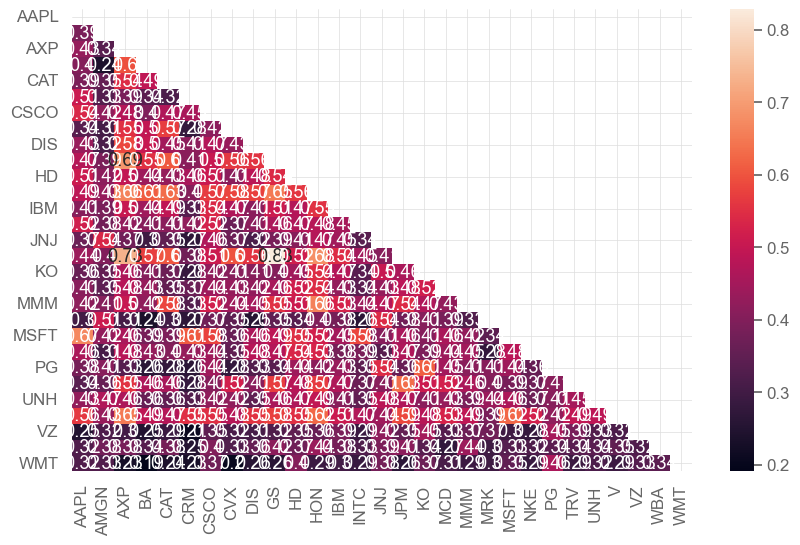

In [63]:
# Correlation Matrix
corr = daily_return_DowJones.corr()
print(corr)
mask = np.zeros_like(corr, dtype=np.bool_)  # Create a mask to hide the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

In [90]:
# Calculating Standard Deviations for all stocks

# Dictionary to store standard deviations
std_devs = {}

# Loop through each column (ticker) in the DataFrame
for ticker in daily_return_DowJones:
    std_dev = daily_return_DowJones[ticker].std()  # Calculate the standard deviation for the ticker
    std_devs[custom_names[ticker]] = std_dev

# Sort the SD in ascending order --> reverse = False
sorted_std_devs = sorted(std_devs.items(), key=lambda x: x[1], reverse=False)

# Display the standard deviations
for ticker, std_dev in sorted_std_devs:
    print(f"SD for {ticker}: {round(std_dev, 3)}")

SD for Coca-Cola Co (KO): 0.011
SD for Johnson & Johnson (JNJ): 0.011
SD for Procter & Gamble Co (PG): 0.012
SD for Verizon Communications Inc (VZ): 0.012
SD for McDonald's Corp (MCD): 0.013
SD for Walmart Inc (WMT): 0.013
SD for Merck & Co inc (MRK): 0.014
SD for Honeywell International Inc (HON): 0.014
SD for Travelers Companies Inc (TRV): 0.015
SD for 3M Co (MMM): 0.015
SD for IBM Corp  (IBM): 0.015
SD for Home Depot Inc (HD): 0.015
SD for Amgen Inc (AMGN): 0.016
SD for Visa Inc (V): 0.016
SD for Cisco Systems Inc (CSCO): 0.016
SD for UnitedHealth Group (UNH): 0.016
SD for JPMorgan Chase & Co (JPM): 0.017
SD for Microsoft (MSFT): 0.017
SD for Walt Disney Co (DIS): 0.017
SD for Goldman Sachs Group (GS): 0.018
SD for Apple Inc (AAPL): 0.018
SD for Nike Inc (NKE): 0.018
SD for Caterpillar Inc (CAT): 0.018
SD for Chevorn Corp (CVX): 0.019
SD for Walgreens Boots Alliance Inc (WBA): 0.019
SD for American Express (AXP): 0.019
SD for Intel Corp (INTC): 0.02
SD for Salesforce Inc (CRM): 0.02

In [91]:
# Loading data from the Dow Jones (DJIA) as the benchmark
dow_jones = qs.utils.download_returns('^DJI')
dow_jones = dow_jones.loc[start_date:end_date]
#sp500.index = sp500.index.tz_localize()
#dow_jones

[*********************100%%**********************]  1 of 1 completed



Dow Jones 2 Returns Plot


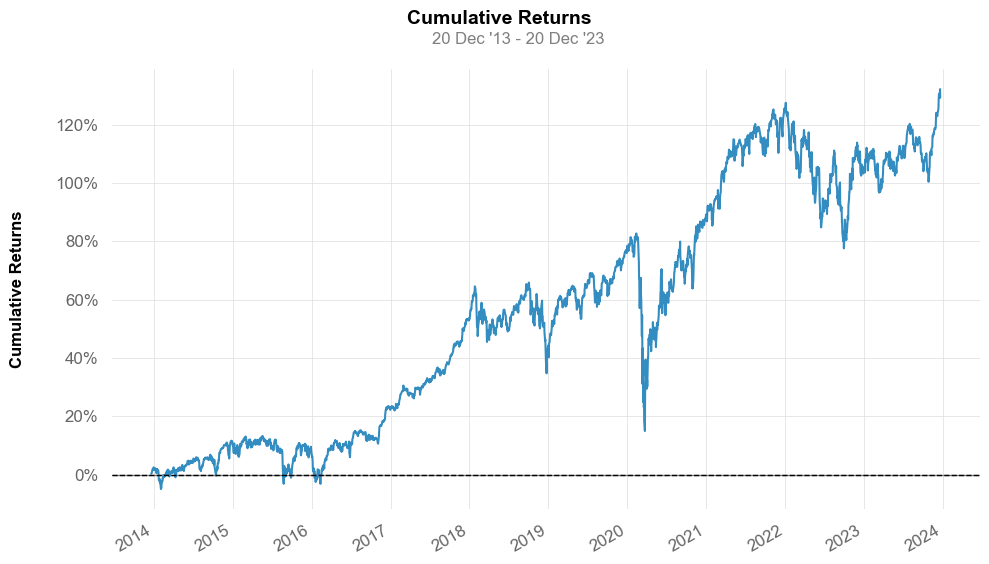

In [92]:
print('\nDow Jones 2 Returns Plot\n')
qs.plots.returns(dow_jones)

In [93]:
# Removing index ('Date' column)

daily_return_DowJones_no_index = daily_return_DowJones.reset_index(drop=True)
#daily_return_DowJones_no_index
dow_jones_no_index = dow_jones.reset_index(drop=True)
#print(dow_jones_no_index)

In [94]:
# Fitting linear relation between stocks and benchmark (Dow Jones) to get Alpha and Beta values

X = dow_jones_no_index.values.reshape(-1, 1)

# Initialize a dictionary to store alpha and beta values
alpha_beta_values = {}

# Loop through each ticker
for ticker in tickers.split():
    # Get the daily returns for the ticker
    y = daily_return_DowJones[ticker].values.reshape(-1, 1)

    # Perform linear regression
    linreg = LinearRegression().fit(X, y)

    # Extract alpha and beta
    beta = linreg.coef_[0][0]
    alpha = linreg.intercept_[0]

    # Store the values in the dictionary
    alpha_beta_values[custom_names[ticker]] = {'alpha': alpha, 'beta': beta}

    # Sort the dictionary by beta values in ascending order (from low to high volatility)
    sorted_alpha_beta = dict(sorted(alpha_beta_values.items(), key=lambda item: item[1]['beta']))

# Print the alpha and beta values
for name, values in sorted_alpha_beta.items():
    print(f"{name}:\n - Alpha: {values['alpha'].round(3)}, Beta: {values['beta'].round(3)}")

"""
Beta is a measure of a stock's volatility compared to the market:
--> Beta of 1 means that the stock is as volatile as the market
--> Beta greater than 1 indicates higher volatility than the market
--> Beta less than 1 suggests lower volatility
"""

Verizon Communications Inc (VZ):
 - Alpha: -0.0, Beta: 0.524
Walmart Inc (WMT):
 - Alpha: 0.0, Beta: 0.542
Procter & Gamble Co (PG):
 - Alpha: 0.0, Beta: 0.606
Johnson & Johnson (JNJ):
 - Alpha: 0.0, Beta: 0.634
Merck & Co inc (MRK):
 - Alpha: 0.0, Beta: 0.642
Coca-Cola Co (KO):
 - Alpha: -0.0, Beta: 0.65
McDonald's Corp (MCD):
 - Alpha: 0.0, Beta: 0.762
Amgen Inc (AMGN):
 - Alpha: 0.0, Beta: 0.794
Walgreens Boots Alliance Inc (WBA):
 - Alpha: -0.0, Beta: 0.892
Travelers Companies Inc (TRV):
 - Alpha: 0.0, Beta: 0.909
IBM Corp  (IBM):
 - Alpha: -0.0, Beta: 0.921
3M Co (MMM):
 - Alpha: -0.0, Beta: 0.932
UnitedHealth Group (UNH):
 - Alpha: 0.001, Beta: 0.969
Cisco Systems Inc (CSCO):
 - Alpha: 0.0, Beta: 0.993
Home Depot Inc (HD):
 - Alpha: 0.0, Beta: 1.012
Nike Inc (NKE):
 - Alpha: 0.0, Beta: 1.039
Walt Disney Co (DIS):
 - Alpha: -0.0, Beta: 1.041
Honeywell International Inc (HON):
 - Alpha: 0.0, Beta: 1.05
Apple Inc (AAPL):
 - Alpha: 0.001, Beta: 1.096
Visa Inc (V):
 - Alpha: 0.0, Beta

"\nBeta is a measure of a stock's volatility compared to the market:\n--> Beta of 1 means that the stock is as volatile as the market\n--> Beta greater than 1 indicates higher volatility than the market\n--> Beta less than 1 suggests lower volatility\n"

In [95]:
# Calculating the Sharpe Ratio for all stocks

# Dictionary to store sharpe ratio
sharpe_ratios = {}

# Loop through each column (ticker) in the DataFrame
for ticker in daily_return_DowJones.columns:
    # Get the return series for the ticker
    returns = daily_return_DowJones[ticker]

    # Calculate the Sharpe ratio for the ticker
    sharpe_ratio = qs.stats.sharpe(returns)
    sharpe_ratios[custom_names[ticker]] = sharpe_ratio

# Sort the Sharpe ratios in descending order
sorted_sharpe_ratios = sorted(sharpe_ratios.items(), key=lambda x: x[1], reverse=True)

# Display the Sharpe ratios
for ticker, sharpe_ratio in sorted_sharpe_ratios:
    print(f"Sharpe Ratio for {ticker}: {round(sharpe_ratio, 3)}")

"""
The Sharpe ratio is a measure of the risk-adjusted return of an investment
A higher Sharpe ratio indicates that an investment provides higher returns for a given level of risk compared to other investments with a lower Sharpe ratio
--> Sharpe Ratio > 1: attractive Investment
--> Sharpe Ratio < 1: unattractive Investment
"""

Sharpe Ratio for Microsoft (MSFT): 0.995
Sharpe Ratio for Apple Inc (AAPL): 0.954
Sharpe Ratio for UnitedHealth Group (UNH): 0.902
Sharpe Ratio for Visa Inc (V): 0.755
Sharpe Ratio for Home Depot Inc (HD): 0.734
Sharpe Ratio for McDonald's Corp (MCD): 0.654
Sharpe Ratio for Salesforce Inc (CRM): 0.631
Sharpe Ratio for Caterpillar Inc (CAT): 0.556
Sharpe Ratio for Nike Inc (NKE): 0.54
Sharpe Ratio for JPMorgan Chase & Co (JPM): 0.531
Sharpe Ratio for Honeywell International Inc (HON): 0.501
Sharpe Ratio for Merck & Co inc (MRK): 0.488
Sharpe Ratio for Amgen Inc (AMGN): 0.486
Sharpe Ratio for Cisco Systems Inc (CSCO): 0.47
Sharpe Ratio for Walmart Inc (WMT): 0.435
Sharpe Ratio for Travelers Companies Inc (TRV): 0.432
Sharpe Ratio for Goldman Sachs Group (GS): 0.414
Sharpe Ratio for Procter & Gamble Co (PG): 0.399
Sharpe Ratio for American Express (AXP): 0.393
Sharpe Ratio for Johnson & Johnson (JNJ): 0.374
Sharpe Ratio for Boeing Co (BA): 0.364
Sharpe Ratio for Intel Corp (INTC): 0.348
S

'\nThe Sharpe ratio is a measure of the risk-adjusted return of an investment\nA higher Sharpe ratio indicates that an investment provides higher returns for a given level of risk compared to other investments with a lower Sharpe ratio\n--> Sharpe Ratio > 1: attractive Investment\n--> Sharpe Ratio < 1: unattractive Investment\n'

In [96]:
# # Weights of the stocks in the Dow Jones w/o Dow Inc (weights as of 2023-12-22)
# weights = {
#     "AXP": 0.0111,
#     "AMGN": 0.0123,
#     "AAPL": 0.2535,
#     "BA": 0.0129,
#     "CAT": 0.0122,
#     "CSCO": 0.,
#     "CVX": 0.0241,
#     "GS": 0.0106,
#     "HD": 0.0296,
#     "HON": 0.0114,
#     "IBM": 0.0119,
#     "INTC": 0.0160,
#     "JNJ": 0.0334,
#     "KO": 0.0207,
#     "JPM": 0.0405,
#     "MCD": 0.0176,
#     "MMM": 0.0048,
#     "MRK": 0.0222,
#     "MSFT": 0.2292,
#     "NKE": 0.0139,
#     "PG": 0.0282,
#     "TRV": 0.0036,
#     "UNH": 0.0401,
#     "CRM": 0.022,
#     "VZ": 0.013,
#     "V": 0.0349,
#     "WBA": 0.019,
#     "WMT": 0.0344,
#     "DIS": 0.0138
# }
# 
# # Checking the sum of the weights 
# total_weight = sum(weights.values())
# total_weight

In [97]:
# # Creating the portfolio by multiplying the weights with the tickers (stocks)
# weighted_stocks = pd.DataFrame(index=daily_return_DowJones.index)
# 
# # Multiply each column (stock) by its weight and add to the weighted_stocks DataFrame
# for ticker, weight in weights.items():
#     weighted_stocks[ticker] = daily_return_DowJones[ticker] * weight
# 
# # Sum across the columns to get the combined portfolio value
# portfolio = weighted_stocks.sum(axis=1)
# portfolio

In [98]:
#qs.reports.full(portfolio, benchmark=dow_jones)

In [99]:
# --Optimization Part-- Markowitz Mean-Variance Optimization Model
# Calculating the annualized expected returns and the annualized sample covariance matrix w/ Adj Close Stock Prices
mu = expected_returns.mean_historical_return(adj_close_data)  # Expected returns
S = risk_models.sample_cov(adj_close_data)  # Covariance matrix

In [100]:
# Visualizing the annualized expected returns

sorted_mu = mu.sort_values(ascending=False)
print(sorted_mu)

Microsoft (MSFT)                      0.283208
Apple Inc (AAPL)                      0.276780
UnitedHealth Group (UNH)              0.236568
Home Depot Inc (HD)                   0.187126
Visa Inc (V)                          0.178798
Salesforce Inc (CRM)                  0.173114
Caterpillar Inc (CAT)                 0.158612
McDonald's Corp (MCD)                 0.146798
JPMorgan Chase & Co (JPM)             0.144907
Nike Inc (NKE)                        0.135053
Cisco Systems Inc (CSCO)              0.125204
Amgen Inc (AMGN)                      0.124072
Merck & Co inc (MRK)                  0.119291
Honeywell International Inc (HON)     0.114224
Goldman Sachs Group (GS)              0.101801
Travelers Companies Inc (TRV)         0.101715
Walmart Inc (WMT)                     0.095506
Intel Corp (INTC)                     0.094863
American Express (AXP)                0.094113
Procter & Gamble Co (PG)              0.090827
Boeing Co (BA)                        0.084932
Johnson & Joh

In [101]:
# Visualizing the covariance matrix
S

,American Express (AXP),Amgen Inc (AMGN),Apple Inc (AAPL),Boeing Co (BA),Caterpillar Inc (CAT),Cisco Systems Inc (CSCO),Chevorn Corp (CVX),Goldman Sachs Group (GS),Home Depot Inc (HD),Honeywell International Inc (HON),...,Nike Inc (NKE),Procter & Gamble Co (PG),Travelers Companies Inc (TRV),UnitedHealth Group (UNH),Salesforce Inc (CRM),Verizon Communications Inc (VZ),Visa Inc (V),Walgreens Boots Alliance Inc (WBA),Walmart Inc (WMT),Walt Disney Co (DIS)
American Express (AXP),0.092681,0.025432,0.037052,0.071263,0.048614,0.036192,0.049778,0.059216,0.036440,0.045645,...,0.041368,0.018601,0.039125,0.035784,0.040999,0.017581,0.049041,0.034998,0.014483,0.048178
Amgen Inc (AMGN),0.025432,0.060838,0.027203,0.023170,0.025706,0.026283,0.022342,0.027350,0.024745,0.023920,...,0.021780,0.018482,0.020653,0.029416,0.028469,0.015161,0.026399,0.027905,0.016686,0.021414
Apple Inc (AAPL),0.037052,0.027203,0.080721,0.045176,0.032528,0.038053,0.028401,0.038139,0.035056,0.031340,...,0.037252,0.019954,0.022358,0.030653,0.050281,0.013678,0.039637,0.027762,0.019135,0.033475
Boeing Co (BA),0.071263,0.023170,0.045176,0.154169,0.056423,0.038768,0.058009,0.061313,0.041891,0.054190,...,0.047898,0.018989,0.041982,0.036083,0.046982,0.018735,0.047648,0.039687,0.015494,0.053596
Caterpillar Inc (CAT),0.048614,0.025706,0.032528,0.056423,0.085773,0.034361,0.049728,0.049965,0.030405,0.041862,...,0.033867,0.014988,0.030724,0.026459,0.032487,0.016172,0.034400,0.033584,0.014487,0.035709
Cisco Systems Inc (CSCO),0.036192,0.026283,0.038053,0.038768,0.034361,0.062277,0.031212,0.035471,0.030590,0.031942,...,0.031714,0.020315,0.023583,0.026595,0.039636,0.016825,0.033902,0.030101,0.019529,0.032139
Chevorn Corp (CVX),0.049778,0.022342,0.028401,0.058009,0.049728,0.031212,0.087111,0.046965,0.029363,0.038897,...,0.029809,0.015126,0.035611,0.031642,0.028954,0.017733,0.034839,0.028895,0.012686,0.034968
Goldman Sachs Group (GS),0.059216,0.027350,0.038139,0.061313,0.049965,0.035471,0.046965,0.079456,0.036758,0.041340,...,0.037980,0.017418,0.037223,0.032800,0.040295,0.017515,0.040157,0.035230,0.015309,0.042664
Home Depot Inc (HD),0.036440,0.024745,0.035056,0.041891,0.030405,0.030590,0.029363,0.036758,0.057941,0.030725,...,0.036895,0.019328,0.026748,0.028614,0.038299,0.016065,0.032928,0.027009,0.020230,0.031634
Honeywell International Inc (HON),0.045645,0.023920,0.031340,0.054190,0.041862,0.031942,0.038897,0.041340,0.030725,0.051118,...,0.034193,0.017210,0.029729,0.028297,0.031572,0.015611,0.034910,0.029545,0.013854,0.035264


In [102]:
# Optimizing for maximal Sharpe ratio
ef_1 = EfficientFrontier(mu, S)  # Providing expected returns and covariance matrix as input
weights_sharpe = ef_1.max_sharpe()  # Optimizing weights for Sharpe ratio maximization 

clean_weights_sharpe = ef_1.clean_weights()  # clean_weights rounds the weights and clips near-zeros
clean_weights_sharpe

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


OrderedDict([('American Express (AXP)', 0.0),
             ('Amgen Inc (AMGN)', 0.0),
             ('Apple Inc (AAPL)', 0.24068),
             ('Boeing Co (BA)', 0.0),
             ('Caterpillar Inc (CAT)', 0.0),
             ('Cisco Systems Inc (CSCO)', 0.0),
             ('Chevorn Corp (CVX)', 0.0),
             ('Goldman Sachs Group (GS)', 0.0),
             ('Home Depot Inc (HD)', 0.0),
             ('Honeywell International Inc (HON)', 0.0),
             ('IBM Corp  (IBM)', 0.0),
             ('Intel Corp (INTC)', 0.0),
             ('Johnson & Johnson (JNJ)', 0.0),
             ('Coca-Cola Co (KO)', 0.0),
             ('JPMorgan Chase & Co (JPM)', 0.0),
             ("McDonald's Corp (MCD)", 0.06392),
             ('3M Co (MMM)', 0.0),
             ('Merck & Co inc (MRK)', 0.0),
             ('Microsoft (MSFT)', 0.35756),
             ('Nike Inc (NKE)', 0.0),
             ('Procter & Gamble Co (PG)', 0.0),
             ('Travelers Companies Inc (TRV)', 0.0),
             ('United

In [103]:
# Optimizing for minimal Volatility
ef_2 = EfficientFrontier(mu, S)  # Providing expected returns and covariance matrix as input
weights_vol = ef_2.min_volatility()  # Optimizing weights for Sharpe ratio maximization 

clean_weights_vol = ef_2.clean_weights()  # clean_weights rounds the weights and clips near-zeros
clean_weights_vol

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


OrderedDict([('American Express (AXP)', 0.0),
             ('Amgen Inc (AMGN)', 0.0),
             ('Apple Inc (AAPL)', 0.0),
             ('Boeing Co (BA)', 0.0),
             ('Caterpillar Inc (CAT)', 0.0038),
             ('Cisco Systems Inc (CSCO)', 0.0),
             ('Chevorn Corp (CVX)', 0.0),
             ('Goldman Sachs Group (GS)', 0.0),
             ('Home Depot Inc (HD)', 0.0),
             ('Honeywell International Inc (HON)', 0.0),
             ('IBM Corp  (IBM)', 0.00151),
             ('Intel Corp (INTC)', 0.0),
             ('Johnson & Johnson (JNJ)', 0.16105),
             ('Coca-Cola Co (KO)', 0.13413),
             ('JPMorgan Chase & Co (JPM)', 0.0),
             ("McDonald's Corp (MCD)", 0.13099),
             ('3M Co (MMM)', 0.02055),
             ('Merck & Co inc (MRK)', 0.0779),
             ('Microsoft (MSFT)', 0.0),
             ('Nike Inc (NKE)', 0.0),
             ('Procter & Gamble Co (PG)', 0.08622),
             ('Travelers Companies Inc (TRV)', 0.0),
   

In [110]:
# Optimizing for given target risk (Volatility)
ef = EfficientFrontier(mu, S)  # Providing expected returns and covariance matrix as input
weights= ef.efficient_risk(target_volatility=0.1367)  # maximises return for a given target risk

clean_weights = ef.clean_weights()  # clean_weights rounds the weights and clips near-zeros
clean_weights

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


OrderedDict([('American Express (AXP)', 0.0),
             ('Amgen Inc (AMGN)', 0.0),
             ('Apple Inc (AAPL)', 0.0124),
             ('Boeing Co (BA)', 0.0),
             ('Caterpillar Inc (CAT)', 0.01674),
             ('Cisco Systems Inc (CSCO)', 0.0),
             ('Chevorn Corp (CVX)', 0.0),
             ('Goldman Sachs Group (GS)', 0.0),
             ('Home Depot Inc (HD)', 0.0),
             ('Honeywell International Inc (HON)', 0.0),
             ('IBM Corp  (IBM)', 0.0),
             ('Intel Corp (INTC)', 0.0),
             ('Johnson & Johnson (JNJ)', 0.16021),
             ('Coca-Cola Co (KO)', 0.12977),
             ('JPMorgan Chase & Co (JPM)', 0.0),
             ("McDonald's Corp (MCD)", 0.14586),
             ('3M Co (MMM)', 0.0),
             ('Merck & Co inc (MRK)', 0.08275),
             ('Microsoft (MSFT)', 0.0),
             ('Nike Inc (NKE)', 0.0),
             ('Procter & Gamble Co (PG)', 0.09012),
             ('Travelers Companies Inc (TRV)', 0.0),
      

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


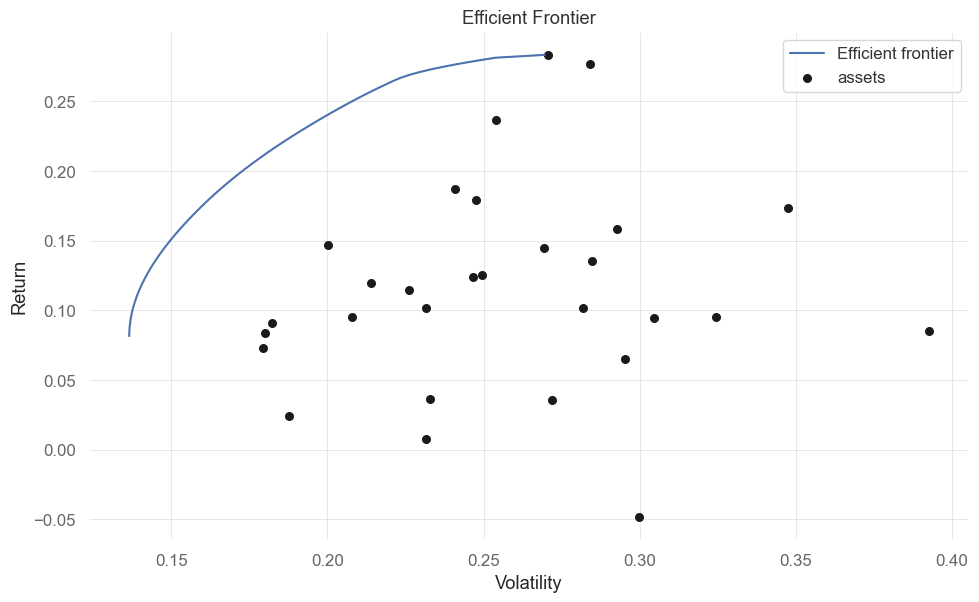

In [86]:
import matplotlib.pyplot as plt
from pypfopt import plotting

# Create the EfficientFrontier object with updated constraints
ef = EfficientFrontier(mu, S, weight_bounds=(0.0, 1.0))

# Create the plot
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Manually annotate each asset
# for i, ticker in enumerate(tickers):
#     expected_return = mu[ticker]
#     volatility = np.sqrt(S.loc[ticker, ticker])
#     ax.annotate(ticker,
#                 (volatility, expected_return),  # x, y coordinates
#                 textcoords="offset points",
#                 xytext=(0, 10),
#                 ha='center')

# Set titles and labels
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Show the plot
plt.show()

In [79]:
# Filtering out all zero weights and sort rest in descending order
filtered_sorted_weights = {k: v for k, v in sorted(clean_weights_sharpe.items(), key=lambda item: item[1], reverse=True)
                           if
                           v > 0}
print(filtered_sorted_weights)
sum(filtered_sorted_weights.values())  # Checking sum of weights

{'Microsoft (MSFT)': 0.35756, 'UnitedHealth Group (UNH)': 0.33783, 'Apple Inc (AAPL)': 0.24068, "McDonald's Corp (MCD)": 0.06392}


0.9999899999999999

In [80]:
# Filtering out all zero weights and sort rest in descending order
filtered_sorted_weights = {k: v for k, v in sorted(clean_weights_vol.items(), key=lambda item: item[1], reverse=True) if
                           v > 0}
print(filtered_sorted_weights)
sum(filtered_sorted_weights.values())  # Checking sum of weights

{'Verizon Communications Inc (VZ)': 0.20421, 'Johnson & Johnson (JNJ)': 0.16105, 'Walmart Inc (WMT)': 0.15927, 'Coca-Cola Co (KO)': 0.13413, "McDonald's Corp (MCD)": 0.13099, 'Procter & Gamble Co (PG)': 0.08622, 'Merck & Co inc (MRK)': 0.0779, '3M Co (MMM)': 0.02055, 'Walt Disney Co (DIS)': 0.01885, 'Caterpillar Inc (CAT)': 0.0038, 'Salesforce Inc (CRM)': 0.00153, 'IBM Corp  (IBM)': 0.00151}


1.0000099999999998

In [81]:
import re

# Extract stock abbreviations and their weights so that it the same names as the original tickers again
abbreviated_weights_sharpe = {re.search(r'\((.*?)\)', k).group(1): v for k, v in clean_weights_sharpe.items() if v > 0}
abbreviated_weights_vol = {re.search(r'\((.*?)\)', k).group(1): v for k, v in clean_weights_vol.items() if v > 0}

# Display
print("Weights with max Sharpe Ratio:")
print(abbreviated_weights_sharpe)
print("Weights with min Volatility:")
print(abbreviated_weights_vol)

Weights with max Sharpe Ratio:
{'AAPL': 0.24068, 'MCD': 0.06392, 'MSFT': 0.35756, 'UNH': 0.33783}
Weights with min Volatility:
{'CAT': 0.0038, 'IBM': 0.00151, 'JNJ': 0.16105, 'KO': 0.13413, 'MCD': 0.13099, 'MMM': 0.02055, 'MRK': 0.0779, 'PG': 0.08622, 'CRM': 0.00153, 'VZ': 0.20421, 'WMT': 0.15927, 'DIS': 0.01885}


In [82]:
# Creating new portfolio with optimized weights (Sharpe Ratio) by multiplying the new weights with the tickers

optimized_weighted_stocks = pd.DataFrame(index=daily_return_DowJones.index)

# Multiply each column (stock) by its weight and add to the optimized_weighted_stocks DataFrame
for ticker, weight in abbreviated_weights_sharpe.items():
    optimized_weighted_stocks[ticker] = daily_return_DowJones[ticker] * weight

# Sum across the columns to get the combined portfolio value
optimized_portfolio_sharpe = optimized_weighted_stocks.sum(axis=1)

# Display the optimized portfolio
print(optimized_portfolio_sharpe)

Date
2013-12-20    0.012841
2013-12-23    0.011954
2013-12-24    0.002629
2013-12-26    0.005353
2013-12-27   -0.003735
                ...   
2023-12-14   -0.018244
2023-12-15    0.001455
2023-12-18   -0.002443
2023-12-19    0.000375
2023-12-20   -0.010718
Length: 2517, dtype: float64


In [83]:
# Creating new portfolio with optimized weights (Volatility) by multiplying the new weights with the tickers

optimized_weighted_stocks = pd.DataFrame(index=daily_return_DowJones.index)

# Multiply each column (stock) by its weight and add to the optimized_weighted_stocks DataFrame
for ticker, weight in abbreviated_weights_vol.items():
    optimized_weighted_stocks[ticker] = daily_return_DowJones[ticker] * weight

# Sum across the columns to get the combined portfolio value
optimized_portfolio_vol = optimized_weighted_stocks.sum(axis=1)

# Display the optimized portfolio
print(optimized_portfolio_vol)

Date
2013-12-20    0.002360
2013-12-23    0.002874
2013-12-24    0.002755
2013-12-26    0.005244
2013-12-27    0.000886
                ...   
2023-12-14   -0.002722
2023-12-15   -0.007161
2023-12-18    0.008261
2023-12-19    0.001596
2023-12-20   -0.013453
Length: 2517, dtype: float64


/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pa

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-12-20   2013-12-20
End Period                 2023-12-20   2023-12-20
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          73.51%       839.31%
CAGR﹪                     3.88%        16.72%

Sharpe                     0.47         1.15
Prob. Sharpe Ratio         93.14%       99.98%
Smart Sharpe               0.4          0.99
Sortino                    0.67         1.69
Smart Sortino              0.57         1.45
Sortino/√2                 0.47         1.2
Smart Sortino/√2           0.41         1.02
Omega                      1.24         1.24

Max Drawdown               -23.12%      -31.55%
Longest DD Days            608          518
Volatility (ann.)          13.67%       21.42%
R^2                        0.45         0.45
Information Ratio          0.07         0.07
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-06-04,106,-31.546999,-29.228214
2,2021-12-30,2023-01-05,2023-05-31,518,-21.163905,-20.027431
3,2018-10-04,2018-12-24,2019-06-17,257,-20.381025,-17.899450
4,2015-07-21,2015-08-25,2015-10-22,94,-13.979213,-12.982662
5,2020-09-03,2020-09-23,2020-11-04,63,-12.213614,-11.506988


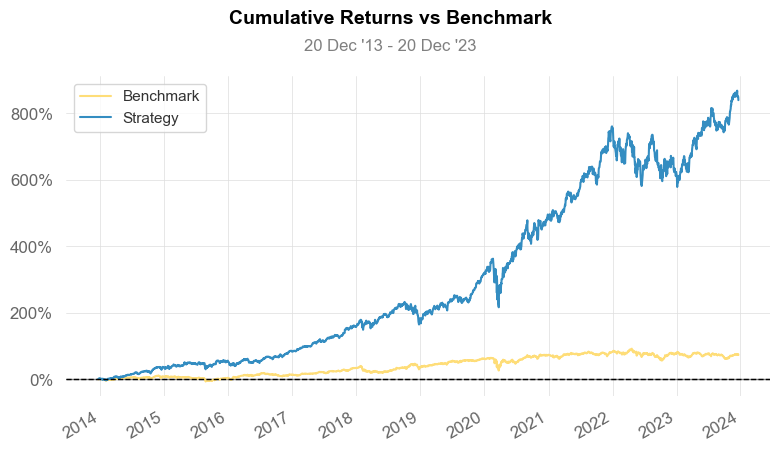

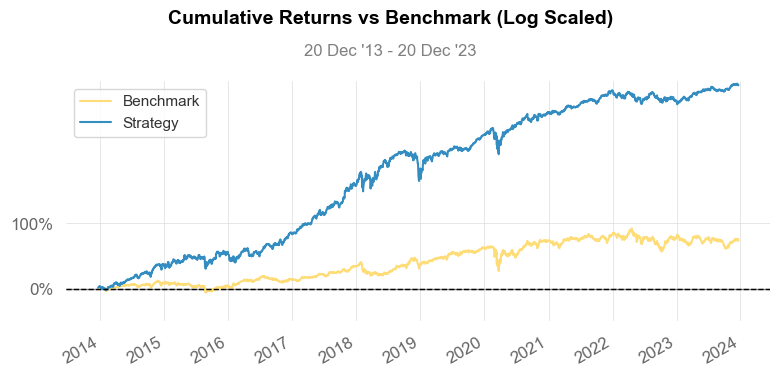

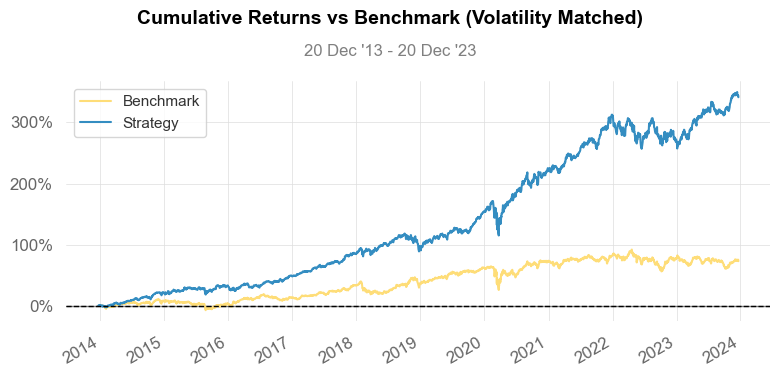

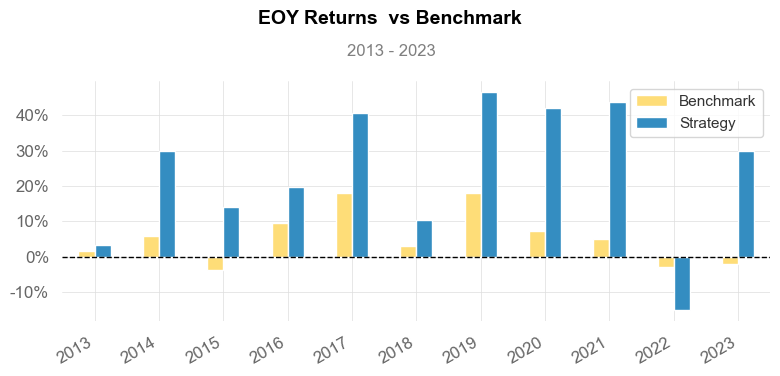

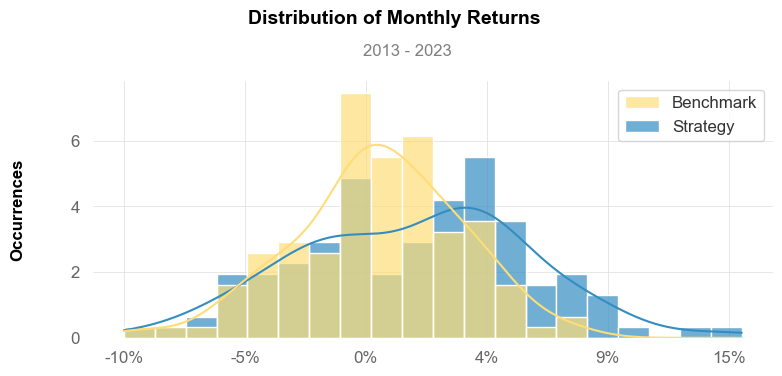

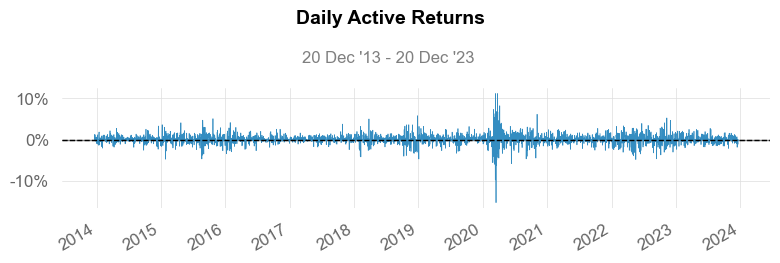

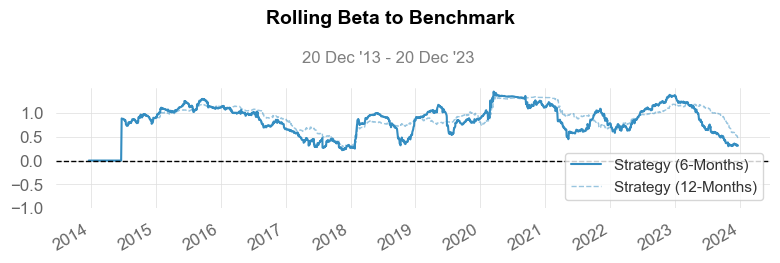

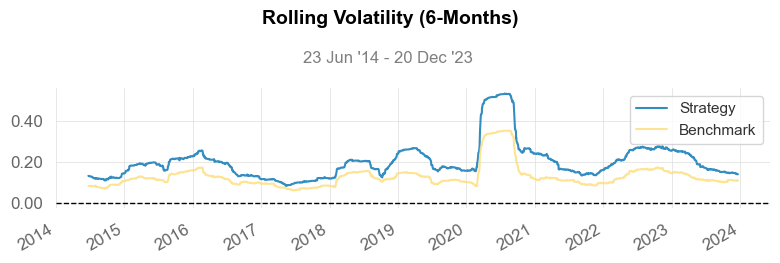

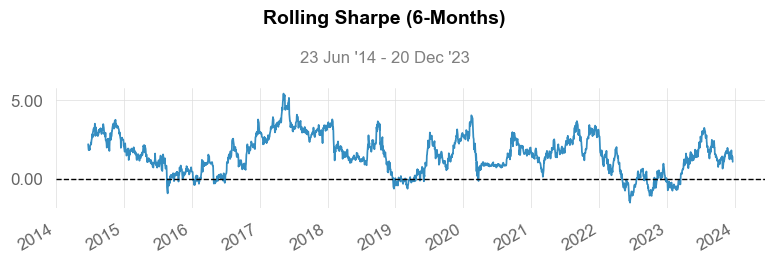

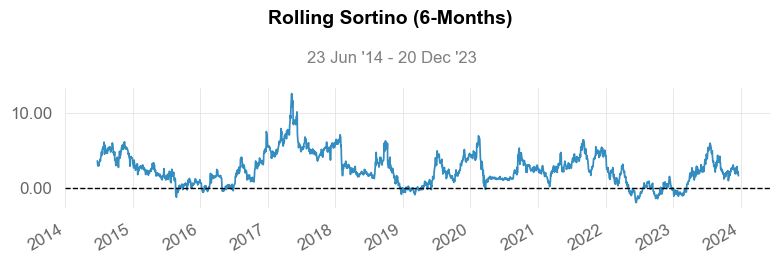

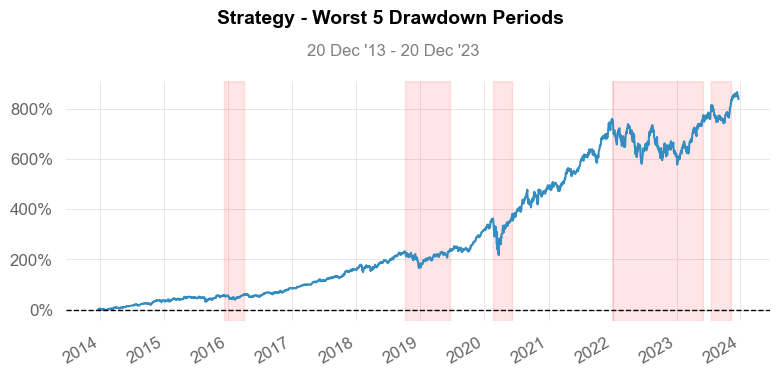

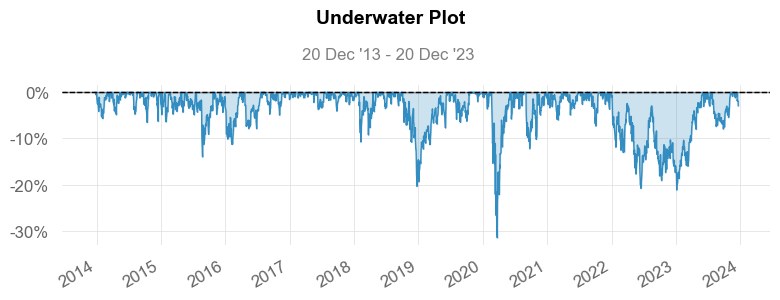

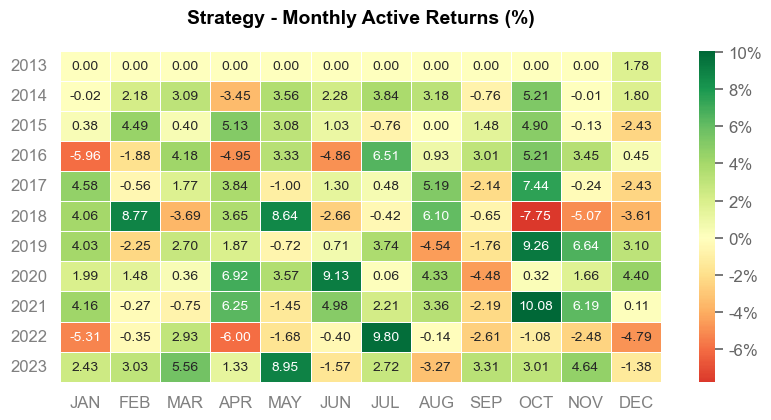

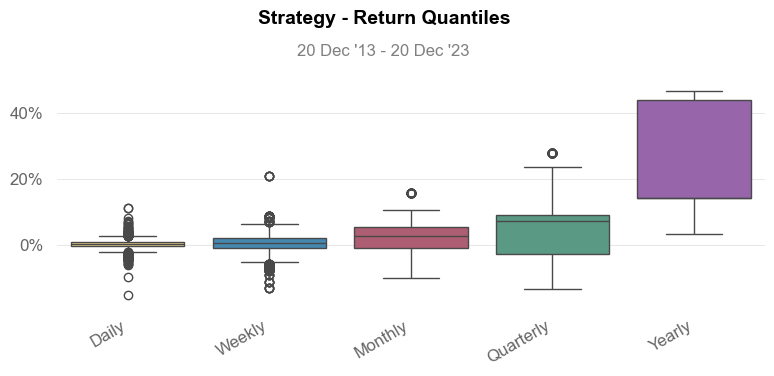

In [84]:
qs.reports.full(optimized_portfolio_sharpe, benchmark=optimized_portfolio_vol)

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pa

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-12-20   2013-12-20
End Period                 2023-12-20   2023-12-20
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          129.2%       839.31%
CAGR﹪                     5.89%        16.72%

Sharpe                     0.56         1.15
Prob. Sharpe Ratio         96.03%       99.98%
Smart Sharpe               0.48         0.99
Sortino                    0.78         1.69
Smart Sortino              0.67         1.45
Sortino/√2                 0.55         1.2
Smart Sortino/√2           0.47         1.02
Omega                      1.24         1.24

Max Drawdown               -37.09%      -31.55%
Longest DD Days            707          518
Volatility (ann.)          17.5%        21.42%
R^2                        0.71         0.71
Information Ratio          0.08         0.08
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-06-04,106,-31.546999,-29.228214
2,2021-12-30,2023-01-05,2023-05-31,518,-21.163905,-20.027431
3,2018-10-04,2018-12-24,2019-06-17,257,-20.381025,-17.899450
4,2015-07-21,2015-08-25,2015-10-22,94,-13.979213,-12.982662
5,2020-09-03,2020-09-23,2020-11-04,63,-12.213614,-11.506988


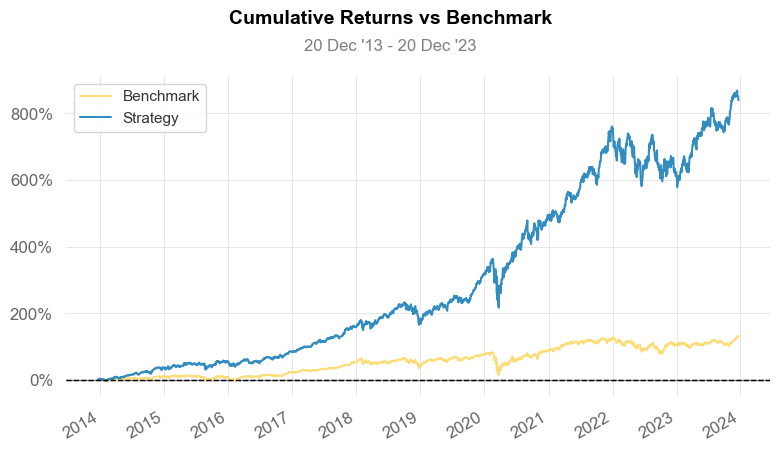

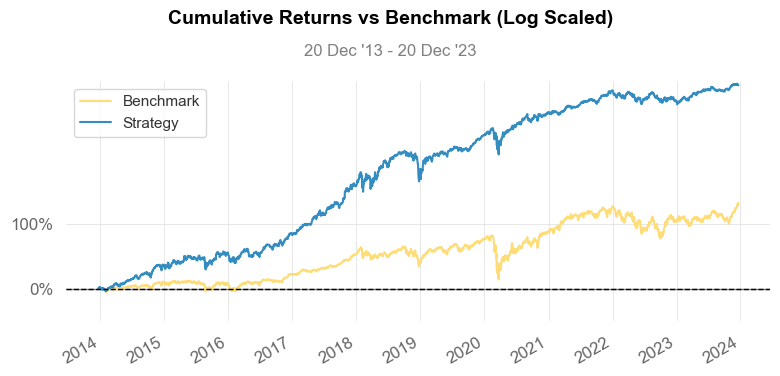

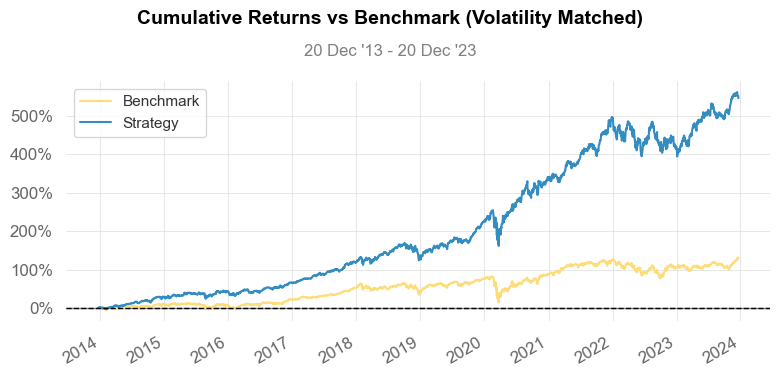

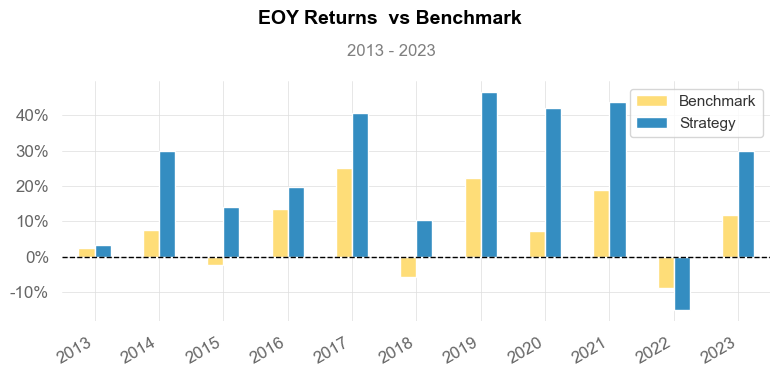

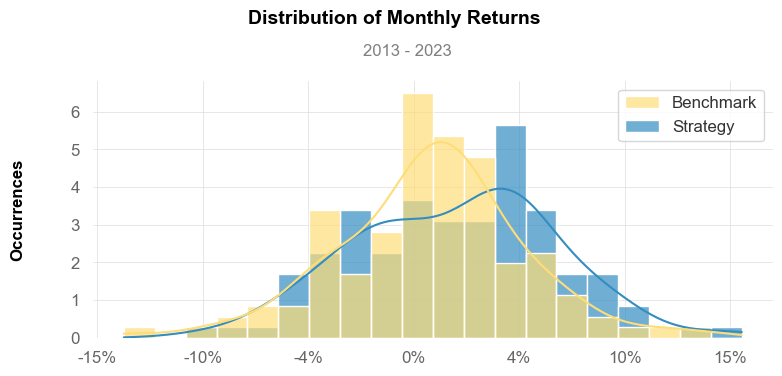

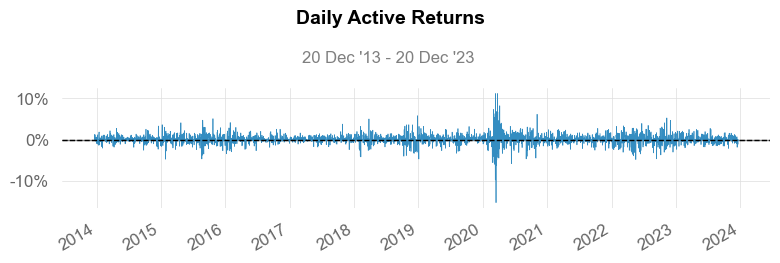

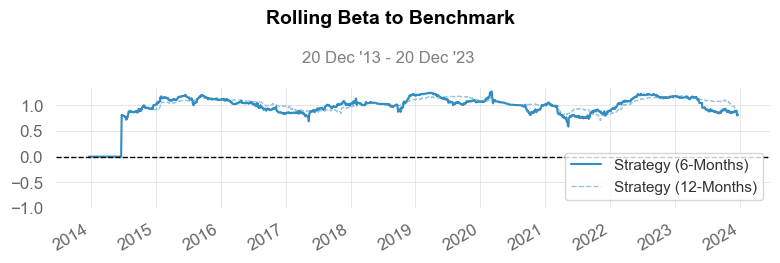

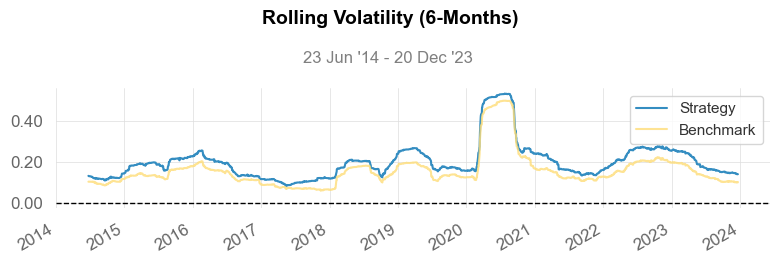

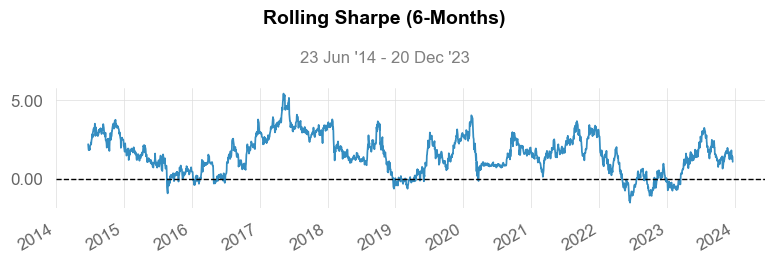

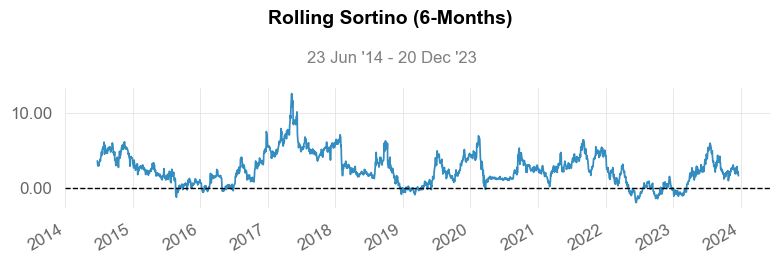

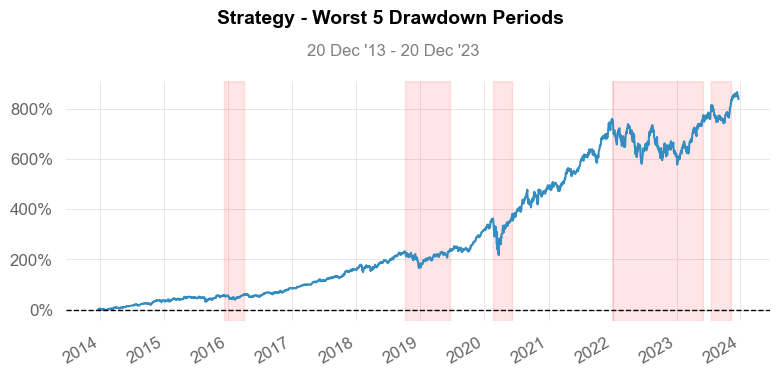

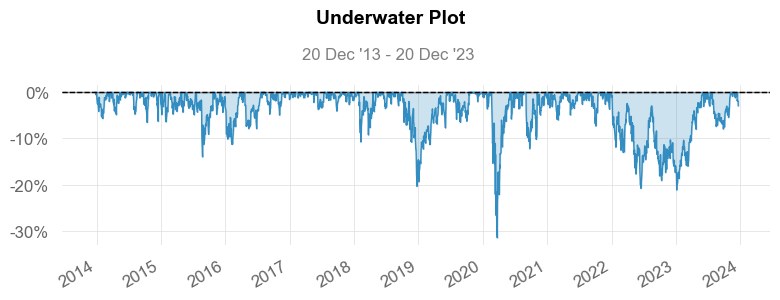

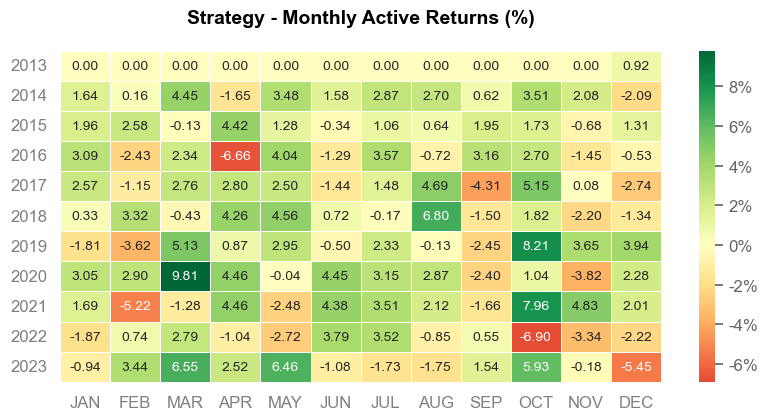

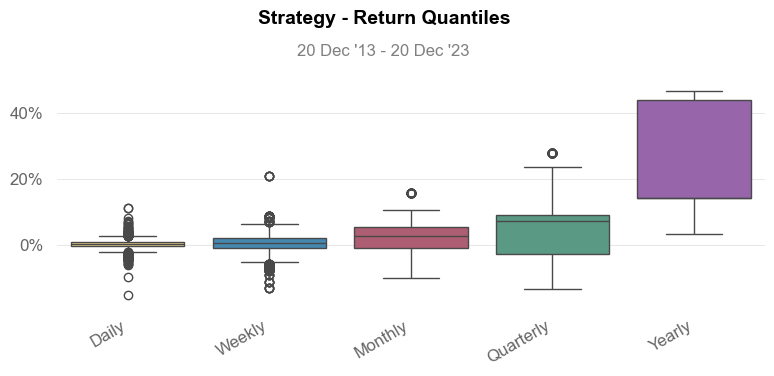

In [85]:
# Displaying new reports comparing the optimized portfolio to the Dow Jones as a Benchmark
qs.reports.full(optimized_portfolio_sharpe, benchmark=dow_jones)

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pa

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-11-01   2023-11-01
End Period                 2023-12-20   2023-12-20
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          12.19%       22.36%
CAGR﹪                     80.68%       182.31%

Sharpe                     8.63         7.95
Prob. Sharpe Ratio         99.96%       99.98%
Smart Sharpe               8.55         7.88
Sortino                    20.91        20.17
Smart Sortino              20.71        19.98
Sortino/√2                 14.78        14.26
Smart Sortino/√2           14.65        14.13
Omega                      4.75         4.75

Max Drawdown               -1.27%       -2.5%
Longest DD Days            4            8
Volatility (ann.)          9.66%        18.54%
R^2                        0.48         0.48
Information Ratio          0.29         0.29
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-12-04,2023-12-06,2023-12-11,8,-2.499942,-2.183639
2,2023-12-20,2023-12-20,2023-12-20,1,-1.316607,NaN
3,2023-11-08,2023-11-09,2023-11-09,2,-0.599715,-0.031266
4,2023-11-21,2023-11-21,2023-11-27,7,-0.551855,-0.384899
5,2023-11-13,2023-11-13,2023-11-13,1,-0.039098,NaN


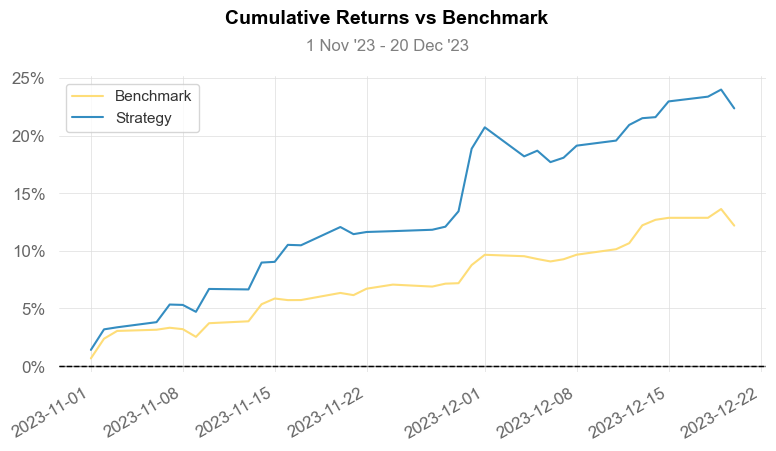

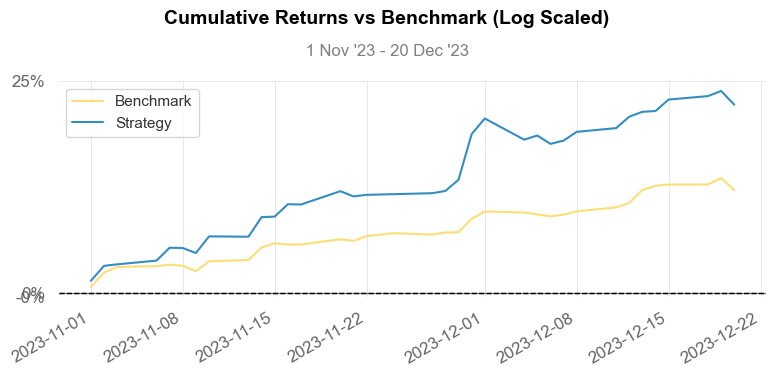

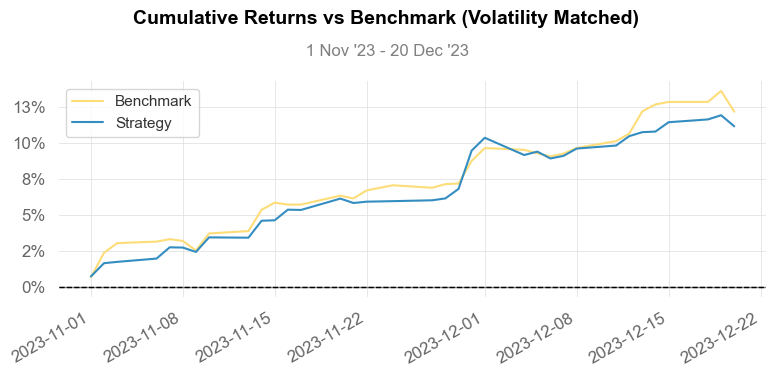

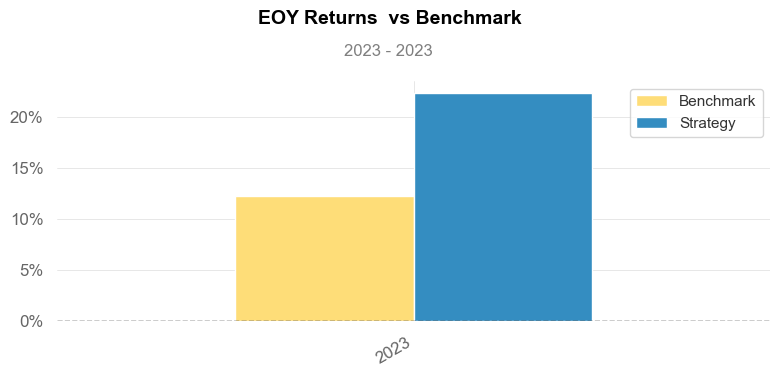

/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/lennartmuller/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

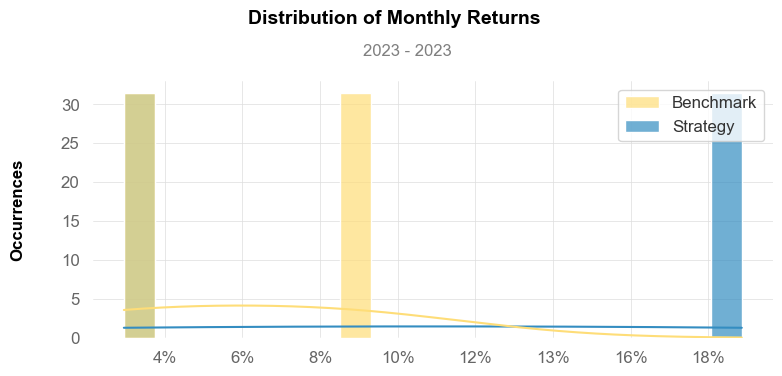

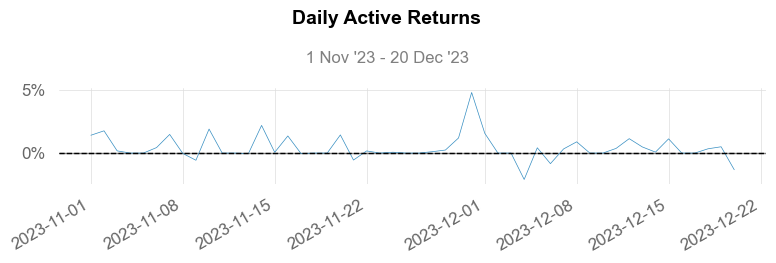

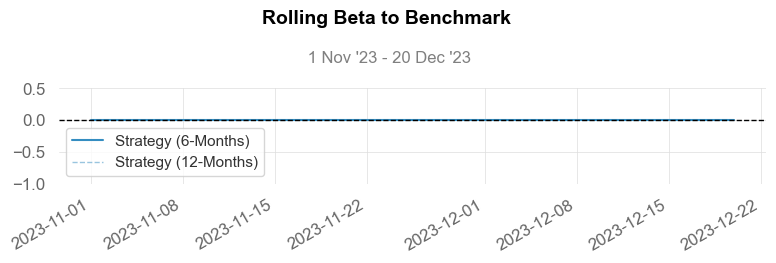

IndexError: index 0 is out of bounds for axis 0 with size 0

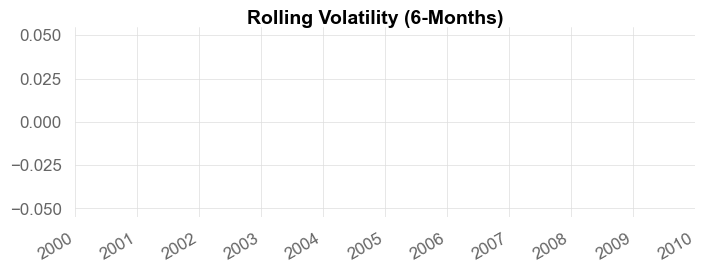

In [119]:
# Only comparing a specific period 

# Define your start and end dates for the period
comparing_period_start = '2023-11-01'  # Replace with your start date
comparing_period_date = '2023-12-31'  # Replace with your end date

# Filter the optimized portfolio and Dow Jones data for the specified period
optimized_portfolio_period = optimized_portfolio.loc[comparing_period_start:comparing_period_date]
dow_jones_period = dow_jones.loc[comparing_period_start:comparing_period_date]

# Display the report comparing the optimized portfolio to the Dow Jones for the specified period
qs.reports.full(optimized_portfolio_period, benchmark=dow_jones_period)